IMPORTANTE
-

El código de este archivo puede correr gracias a un kernel. Cada vez que abres este Jupyter Lab, toma un corto tiempo en cargar el kernel. **Espera unos segundos al inicio** para correr las celdas de código.
***

¿Cómo interactúo con el proyecto?
-

**¿Ves esas herramientas que salen en la esquina superior izquierda?** Para correr celdas de código, puedes hacer clic en 'Run' y después en 'Run Selected Cell' u otra opción. Pero para hacer más eficiente este paseo, puedes usar el atajo **'Shift + Enter'**. Pruébalo aquí, por ejemplo:

In [1]:
print('Enhorabuena. Disfruta de tu paseo por este Notebook!')

Enhorabuena. Disfruta de tu paseo por este Notebook!


¿Qué pasa si, *por accidente*, muevo o borro alguno de los archivos en este Jupyter Lab?
-

Fuera de las modificaciones hechas al mismo repositorio, los cambios que le hagas a este Jupyter Lab son personales, es decir, **ni yo ni nadie se verá afectado** por los cambios que hagas desde tu navegador con el usuario que estés usando.

Tus cambios personales se mantendrán guardados en tu usuario. Si quisieras dejar todo como estaba desde un principio, tendrás que **limpiar el caché en tus datos de navegación**.

¿Algo más que se deba saber?
-

Este Notebook es **secuencial**, es decir, primero empiezas ejecutando el código en el capítulo 1, después en el capítulo 2 y luego en el capítulo 3.

En el capítulo 4, por cada pregunta tendrás el **Planteamiento**, si deseas ver qué se realizó para hallar respuesta a la pregunta, y la **Respuesta**, que mostrará un gráfico con información interesante debajo de él. No te preocupes si quieres saltar directamente hacia la Respuesta, la celda de código de ahí tiene todo lo necesario para armar el gráfico.

Y recuerda, **'Shift + Enter'** es todo lo que necesitas!

# 1) Importar librerías, etc.

Esta celda es la más importante de todas: Todo lo que sigue puede correr gracias a estas librerías y ajustes!

In [1]:
%pip install -q ipympl
%pip install -q ipywidgets

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib widget

mpl.style.use('default')

# 2) Revisar el diccionario de datos

Este diccionario de datos se encuentra en un archivo .csv, el cual puede ser leído y convertido en un dataframe.

In [2]:
df_dic = pd.read_csv('data_dictionary.csv', sep=',', header=0)

for i in range(df_dic.shape[0]):
    if i == 0:
        message = 'Table: ' + str(df_dic['Table'][i]) + '\n\n+ ' \
        + str(df_dic['Field'][i]) + '  ->  Description: ' + str(df_dic['Description'][i])
    elif df_dic['Table'][i] != df_dic['Table'][i-1]:
        message = '\nTable: ' + str(df_dic['Table'][i]) + '\n\n+ ' \
        + str(df_dic['Field'][i]) + '  ->  Description: ' + str(df_dic['Description'][i])
    else:
        message = '+ ' + str(df_dic['Field'][i]) + '  ->  ' + str(df_dic['Description'][i])
    
    print(message)

Table: orders

+ order_id  ->  Description: Unique identifier for each order placed by a table
+ date  ->  Date the order was placed (entered into the system prior to cooking & serving)
+ time  ->  Time the order was placed (entered into the system prior to cooking & serving)

Table: order_details

+ order_details_id  ->  Description: Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)
+ order_id  ->  Foreign key that ties the details in each order to the order itself
+ pizza_id  ->  Foreign key that ties the pizza ordered to its details, like size and price
+ quantity  ->  Quantity ordered for each pizza of the same type and size

Table: pizzas

+ pizza_id  ->  Description: Unique identifier for each pizza (constituted by its type and size)
+ pizza_type_id  ->  Foreign key that ties each pizza to its broader pizza type
+ size  ->  Size of the pizza (Small, Medium, Large, X Large, or XX Large)

De la información anterior, podemos rescatar lo siguiente:

- Hay **4 tablas**: Orders, Order Details, Pizzas y Pizza Types.

Acerca de estas tablas:

- **'Orders'** guarda las órdenes registradas por fecha y hora.
- **'Order Details'** guarda las pizzas y sus cantidades pedidas en cada orden.
- **'Pizzas'** guarda las pizzas que hay, por su tipo y tamaño, así como su precio de venta unitario.
- **'Pizza Types'** guarda los tipos de pizza, junto a sus ingredientes y la categoría en la que caen. En los ingredientes siempre habrá Mozzarella Cheese (queso Mozzarella) incluso si no lo espicifican, y Tomato Sauce (salsa de tomate) sólo no se incluye si mencionan otra salsa.

# 3) Crear dataframes de las tablas

Los dataframes son creados a partir de 4 archivos .csv, justo como fue con el del diccionario. También comprobaremos si hay nulls en estos dataframes:

## Orders -> df_order

In [3]:
df_order = pd.read_csv('pizza_sales/orders.csv', sep=',', header=0)
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 333.7+ KB


## Order Details -> df_orderDet

In [4]:
df_orderDet = pd.read_csv('pizza_sales/order_details.csv', sep=',', header=0)
df_orderDet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ MB


## Pizzas -> df_pizza

In [5]:
df_pizza = pd.read_csv('pizza_sales/pizzas.csv', sep=',', header=0)
df_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.9+ KB


## Pizza Types -> df_pizzaTyp

Originalmente, si tratamos de correr este código con la codificación predeterminada ('utf-8'), obtendremos un error, ya que 'utf-8' no puede decodificar el byte 0x91.
*'Originalmente', ya que al pasar el archivo .csv original al JupyterLite, sale un error. El archivo con los datos de Pizza Types subido fue uno con la corrección del error.* 

Esto lo podemos resolver fácilmente si utilizamos otra codificación. Según internet, la codificación capaz de decodificar este byte es 'windows-1252'.

In [6]:
df_pizzaTyp = pd.read_csv('pizza_sales/pizza_types.csv', encoding='windows-1252', sep=',', header=0, quotechar='"')
if 'Unnamed: 0' in df_pizzaTyp.columns: df_pizzaTyp.drop(columns=['Unnamed: 0'], inplace=True)
df_pizzaTyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 584.0+ bytes


Ningun dataframe contiene nulls. Ya podemos empezar con las preguntas 👀

# 4) Preguntas de análisis

## 1. ¿En qué fechas del año, el negocio tuvo más ganancias o unidades pedidas?

### Planteamiento

Para esta pregunta, necesitaremos usar 2 dataframes principales: 'df_order' y 'df_orderDet'.

Agrupamos por fecha y sumamos las unidades pedidas y los precios totales de cada detalle de orden ('quantity' y 'total_price').

De paso, convertimos estas columnas agrupadas en 'n_units' (unidades pedidas) y 'total_profit' (ganancias totales).

In [13]:
df_E1 = pd.merge(pd.merge(df_order, df_orderDet, on=['order_id'], how='inner'), df_pizza, on=['pizza_id'], how='inner')
df_E1['total_price'] = df_E1.quantity * df_E1.price
df_E1 = df_E1.groupby('date').agg({'quantity': ('sum'), 'total_price': ('sum')})
df_E1.columns = ['n_units', 'total_profit']
df_E1.head()

,n_units,total_profit
date,,
2015-01-01,162,2713.85
2015-01-02,165,2731.90
2015-01-03,158,2662.40
2015-01-04,106,1755.45
2015-01-05,125,2065.95


Y ahora, imprimimos las fechas con mayores ganancias y unidades pedidas.

In [14]:
print(df_E1.sort_values('total_profit', ascending=False)[['total_profit']].head(5))
print(df_E1.sort_values('n_units', ascending=False)[['n_units']].head(5))

            total_profit
date                    
2015-11-27       4422.45
2015-11-26       4405.95
2015-10-15       4320.20
2015-07-04       3864.20
2015-07-03       3443.00
            n_units
date               
2015-11-26      266
2015-11-27      264
2015-10-15      262
2015-07-04      234
2015-07-03      213


Aquí tenemos las top 5 fechas para cada tipo de muestra. Ahora, mostremos esto en un gráfico más interactivo.

### Respuesta

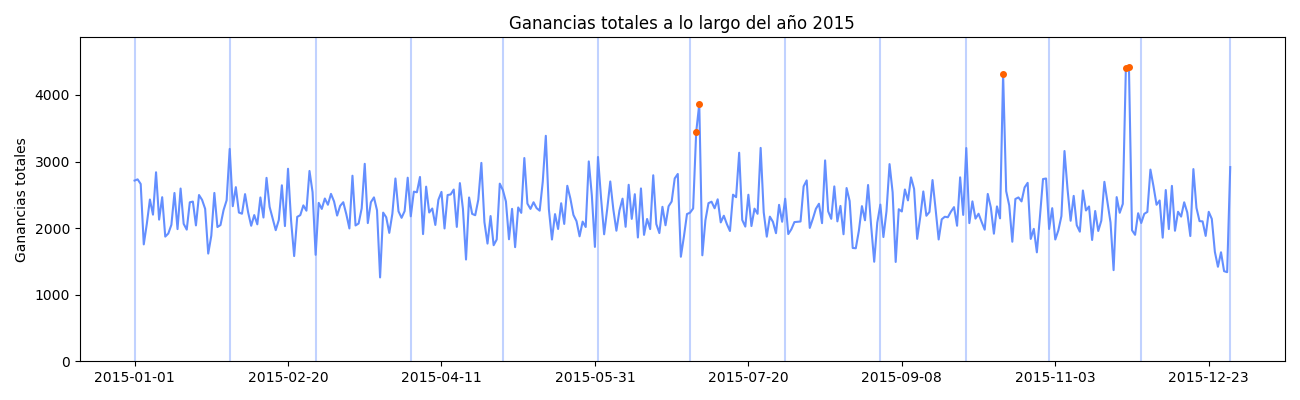

In [8]:
# Para maximizar/minimizar esta celda, presione el rectángulo azul/naranja del costado izquierdo

plt.close('all')

# Paleta de colores hecha por IBM, puesta en diferente orden para comodidades
colorList = ['#fe6100', '#dc267f', '#785ef0', '#648fff', '#ffb000', '#000000', '#ffffff']

# Lista donde guardaremos los textos con las fechas y ganancias totales/unidades pedidas
textos = []

# Crear el dataframe que usaremos para el gráfico
df_E1 = pd.merge(pd.merge(df_order, df_orderDet, on=['order_id'], how='inner'), df_pizza, on=['pizza_id'], how='inner')
df_E1['total_price'] = df_E1.quantity * df_E1.price
df_E1 = df_E1.groupby('date').agg({'quantity': ('sum'), 'total_price': ('sum')})
df_E1.columns = ['n_units', 'total_profit']

E1RP1_n = ''

# Función para graficar la serie temporal
def update_plot1(opt1, opt2):
    
    ax1.clear()
    
    global textos, E1RP1_n
    
    if opt1 == ' de la 1era mitad': E1RP1_n = df_E1.loc[df_E1.index <= '2015-06-31', :]
    elif opt1 == ' de la 2da mitad': E1RP1_n = df_E1.loc[df_E1.index > '2015-06-31', :]
    elif opt1 == ' del 1er trimestre': E1RP1_n = df_E1.loc[df_E1.index <= '2015-03-31', :]
    elif opt1 == ' del 2do trimestre': E1RP1_n = df_E1.loc[(df_E1.index > '2015-03-31') & (df_E1.index <= '2015-06-31'), :]
    elif opt1 == ' del 3er trimestre': E1RP1_n = df_E1.loc[(df_E1.index > '2015-06-31') & (df_E1.index <= '2015-09-31'), :]
    elif opt1 == ' del 4to trimestre': E1RP1_n = df_E1.loc[df_E1.index > '2015-09-31', :]
    else: E1RP1_n = df_E1[:]
    
    maxH, maxW, topValues = df_E1[opt2[0]].max(), E1RP1_n.reset_index().index[-1], list(E1RP1_n.reset_index().sort_values(opt2[0], ascending=False).head(5).index)
    
    E1RP1_n.plot(kind='line', y=opt2[0], ax=ax1, color=colorList[3], legend=False, marker='.', mfc=colorList[0], mec=colorList[0], markersize=8, markevery=topValues, 
                 ylim=(0, maxH * 1.1), xlabel='', ylabel=opt2[1].capitalize(), title= opt2[1].capitalize() + ' a lo largo' + opt1 + ' del año 2015')
    
    firstDayList = list(np.where(E1RP1_n.index.str[8:10].astype(int) == 1)[0])
    firstDayList.append(list(np.where(E1RP1_n.index.str[8:10].astype(int) <= 31)[0])[-1])
    
    for firstDay in firstDayList:
        ax1.axvline(firstDay, color=colorList[3], alpha=0.4, zorder=0)
    
    indices = list(E1RP1_n.reset_index().index)
    
    textos = []
    for i in range(len(indices)):
        ind, valor = indices[i], E1RP1_n[opt2[0]][i]
        textos.append(ax1.text(ind, valor, str(E1RP1_n.index[ind]) + '\n(' + opt2[2] + str(valor) + ')', transform=ax1.transData, fontsize=8, ha='center', va='center'))
        if ind in topValues: textos[i].set_bbox(dict(facecolor=colorList[6], alpha=1, edgecolor=colorList[0]))
        else: textos[i].set_bbox(dict(facecolor=colorList[6], alpha=0.8, edgecolor=colorList[5]))
        textos[i].set_visible(False)    
    
    fig1.tight_layout()
    fig1.canvas.draw()

# Función para mostrar las fechas y ganancias totales/unidades pedidas, cuando el mouse pasa por encima del gráfico
def on_hover(event):
    if event.inaxes:
        puntos, indicador = (list(E1RP1_n.index)), 0
        
        if round(event.xdata) >= 0 and round(event.xdata) <= E1RP1_n.reset_index().index[-1]: indicador = round(event.xdata)
        elif round(event.xdata) < 0: indicador = 0
        else: indicador = E1RP1_n.reset_index().index[-1]
    
        [texto.set_visible(False) for texto in textos]
        if E1RP1_n.index[indicador] in puntos: textos[indicador].set_visible(True)
        
        fig1.canvas.draw()

# Crear los widgets para segmentar la serie, y para mostrar por ganancias totales o por unidades pedidas
dropd1 = widgets.Dropdown(
    options=[('Año 2015', ''), ('1er semestre', ' de la 1era mitad'), ('2do semestre', ' de la 2da mitad'), ('1er trimestre', ' del 1er trimestre'), 
             ('2do trimestre', ' del 2do trimestre'), ('3er trimestre', ' del 3er trimestre'), ('4to trimestre', ' del 4to trimestre')],
    value='', description='Elija una opción para filtrar los datos:',
    layout={'width': 'max-content', 'padding': '1px'}, style= {'description_width': 'initial'}
)

togb1 = widgets.ToggleButtons(
    options=[('Ganancias totales', ['total_profit', 'ganancias totales', '$']), ('Unidades pedidas', ['n_units', 'unidades pedidas', ''])],
    value=['total_profit', 'ganancias totales', '$'], description='Muestra por ganancias totales o unidades pedidas:',
    layout={'width': 'max-content', 'padding': '1px'}, style= {'description_width': 'initial'}
)

# Crear la base (figura y axis) para el gráfico
fig1 = plt.figure(figsize=(13, 4))     
ax1 = fig1.add_subplot()

fig1.canvas.toolbar_visible = False
fig1.canvas.header_visible = False

# Conectar la función 'on_hover' con la figura del gráfico
fig1.canvas.mpl_connect('motion_notify_event', on_hover)

# Conectar función 'update_plot' con los widgets, y desplegar widgets
solution1 = widgets.interactive_output(update_plot1, {'opt1': dropd1, 'opt2': togb1})
sol1 = widgets.VBox(
    [widgets.HBox([dropd1, togb1], layout=widgets.Layout(display='flex', align_items='center', grid_gap='50px', justify_content='center')), 
     solution1]
)
display(sol1)

# Eliminar piezas una vez acabado el despliegue
del dropd1, togb1, solution1, sol1

El siguiente gráfico muestra las ganancias totales, así como la cantidad de pizzas pedidas, por cada fecha del año 2015. 5 marcadores aparecen en el gráfico, señalando las 5 fechas más importantes dentro de la serie. Además, este gráfico puede segmentarse por año completo, por semestre y por trimestre.

En este caso, las fechas más importantes fueron:
- 27 de noviembre, con 4422.45 dólares de ganancia y 264 unidades pedidas.
- 26 de noviembre, con 4405.95 dólares de ganancia y 266 unidades pedidas.
- 15 de octubre, con 4320.20 dólares de ganancia y 262 unidades pedidas.
- 4 de julio, con 3864.20 dólares de ganancia y 234 unidades pedidas.
- 3 de julio, con 3443.00 dólares de ganancia y 213 unidades pedidas.

## 2. ¿En qué meses y días del mes, el negocio tuvo más ganancias o unidades pedidas?

### Planteamiento

Si ponemos atención, las 2 fechas con mayores ventas fueron los 26 y 27 de un mismo mes, en un mismo año. Observemos este comportamiento:

Ya que 'date' y 'time' contienen strings, separemos estos valores en substrings, para obtener el año, mes, día y hora de cada detalle de orden.

Vamos creando la columna 'total_price', que ya sabemos que será agrupada con 'quantity' más adelante.

Y creemos 4 nuevas columnas:
- 'year' será un substring de los primeros 4 caracteres, ya que actualmente no es imposible ver un año con otra cantidad de éstos.
- 'month' será un substring de 2 caracteres y empezando desde el quinto carácter (el cuarto es un guión '-').
- 'day' será un substring de 2 caracteres y empezando desde el octavo carácter (el séptimo es otro guión '-').
- 'hour' será un substring de los primeros 2 caracteres

Estas 4 nuevas columnas serán de tipo **int**, ya que no queremos que los valores se lean como, por ejemplo, '03' o '07', sino como '3' o '7'.

In [16]:
df_E2 = pd.merge(pd.merge(df_orderDet, df_order, on=['order_id'], how='inner'), df_pizza, on=['pizza_id'], how='inner')
df_E2['total_price'] = df_E2.quantity * df_E2.price
df_E2['year'] = df_E2.date.str[:4].astype(int)
df_E2['month'] = df_E2.date.str[5:7].astype(int)
df_E2['day'] = df_E2.date.str[8:].astype(int)
df_E2['hour'] = df_E2.time.str[:2].astype(int)
df_E2.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,total_price,year,month,day,hour
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,13.25,2015,1,1,11
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,13.25,2015,1,2,12
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,13.25,2015,1,3,14
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,13.25,2015,1,3,16
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,13.25,2015,1,4,20


Veamos cuántos años, meses y días tenemos disponibles en nuestro dataframe:

In [17]:
print(dict(df_E2.year.value_counts().sort_index(ascending=True)).keys(), '\n')
print(dict(df_E2.month.value_counts().sort_index(ascending=True)).keys(), '\n')
print(dict(df_E2.day.value_counts().sort_index(ascending=True)).keys(), '\n')
print(dict(df_E2.hour.value_counts().sort_index(ascending=True)).keys(), '\n')

dict_keys([2015]) 

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) 

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]) 

dict_keys([9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]) 



Vemos que existen unidades pedidas en cualquier de los 30-31 días de cualquiera de los 12 meses del año, pero que SÓLO hay registros del 2015.

Y sólo hay unidades pedidas desde las 9 horas del día (9am) hasta las 23 horas (11pm).

Entonces, SÓLO mostraremos las unidades pedidas y ganancias totales por mes, día y hora.

In [18]:
df_E2 = df_E2.groupby(['month', 'day', 'hour']).agg({'quantity': ('sum'), 'total_price': ('sum')})
df_E2.columns = ['n_units', 'total_profit']

Las columnas serán ordenadas por 'total profit', *aunque la mayoría de fechas tienen una **correlación positiva casi perfecta** entre el N° pizzas pedidas y las ganancias totales*

In [19]:
df_E2[['n_units', 'total_profit']].corr()

,n_units,total_profit
n_units,1.000000,0.995468
total_profit,0.995468,1.000000


En fin, veamos qué meses, días y horas trajeron más dinero al negocio, y cuáles se ordenaron un mayor número de pizzas.

In [20]:
print(df_E2.groupby('month').agg({'n_units': ('sum'), 'total_profit': ('sum')}).sort_values('total_profit', ascending=False).head()[['total_profit']])
print(df_E2.groupby('month').agg({'n_units': ('sum'), 'total_profit': ('sum')}).sort_values('n_units', ascending=False).head()[['n_units']])

       total_profit
month              
7          72557.90
5          71402.75
3          70397.10
11         70395.35
1          69793.30
       n_units
month         
7         4392
5         4328
11        4266
3         4261
1         4232


In [21]:
print(df_E2.groupby('day').agg({'n_units': ('sum'), 'total_profit': ('sum')}).sort_values('total_profit', ascending=False).head()[['total_profit']])
print(df_E2.groupby('day').agg({'n_units': ('sum'), 'total_profit': ('sum')}).sort_values('n_units', ascending=False).head()[['n_units']])

     total_profit
day              
15       30588.90
4        29675.65
27       29655.95
1        29608.55
6        28097.45
     n_units
day         
15      1873
1       1811
4       1803
27      1790
6       1709


In [22]:
print(df_E2.groupby('hour').agg({'n_units': ('sum'), 'total_profit': ('sum')}).sort_values('total_profit', ascending=False).head()[['total_profit']])
print(df_E2.groupby('hour').agg({'n_units': ('sum'), 'total_profit': ('sum')}).sort_values('n_units', ascending=False).head()[['n_units']])

      total_profit
hour              
12       111877.90
13       106065.70
18        89296.85
17        86237.45
19        72628.90
      n_units
hour         
12       6776
13       6413
18       5417
17       5211
19       4406


Al parecer, dos fechas de noviembre con las mayores ganancias son algo engañosas.
- En realidad, **julio, mayo y marzo** fueron los meses con mayores ganancias. Después de ellos, recién aparece **noviembre**, y también **enero**
- Los días **15, 4, 27, 1 y 6** de cada mes son los que más ganancias le han generado a la pizzería.
- Las mejores horas del día, en cuanto a ganancias, han sido a las 12, 13, 17, 18 y 19 horas, es decir, al **mediodía**, a la **1pm** y de **5-7pm**.

### Respuesta

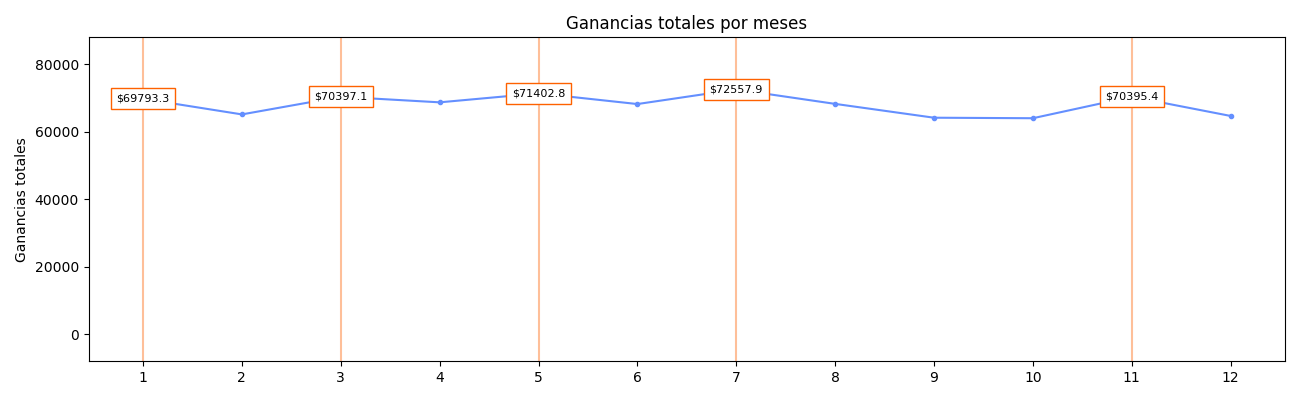

In [9]:
# Para maximizar/minimizar esta celda, presione el rectángulo azul/naranja del costado izquierdo

plt.close('all')

# Paleta de colores hecha por IBM, puesta en diferente orden para comodidades
colorList = ['#fe6100', '#dc267f', '#785ef0', '#648fff', '#ffb000', '#000000', '#ffffff']

# Crear el dataframe que usaremos para el gráfico
df_E2 = pd.merge(pd.merge(df_orderDet, df_order, on=['order_id'], how='inner'), df_pizza, on=['pizza_id'], how='inner')
df_E2['total_price'] = df_E2.quantity * df_E2.price
df_E2['month'] = df_E2.date.str[5:7].astype(int)
df_E2['day'] = df_E2.date.str[8:].astype(int)
df_E2['hour'] = df_E2.time.str[:2].astype(int)
df_E2 = df_E2.groupby(['month', 'day', 'hour']).agg({'quantity': ('sum'), 'total_price': ('sum')})
df_E2.columns = ['n_units', 'total_profit']

# Función para graficar la serie temporal
def update_plot2(op1, op2):
    
    ax2.clear()

    E2RP_ = df_E2.groupby(op1[0]).agg({op2[0]: ('sum')})

    for i in E2RP_.index:
        if i in E2RP_.sort_values(op2[0], ascending=False)[:5].index:
            t = ax2.text(i,  E2RP_[op2[0]][i], op2[2] + str(round(E2RP_[op2[0]][i], 1)), transform=ax2.transData, fontsize=8, ha='center', va='center')
            t.set_bbox(dict(facecolor=colorList[6], alpha=1, edgecolor=colorList[0]))
            ax2.axvline(i, color=colorList[0], alpha=0.4, zorder=0)
    
    minH = maxH = 0
    
    if op2[0] == 'total_profit':
        if op1[0] == 'month': minH, maxH = -8000, 88000
        elif op1[0] == 'hour': minH, maxH = -12000, 132000
        else: minH, maxH = -3000, 33000
    else:
        if op1[0] == 'month': minH, maxH = -500, 5500
        elif op1[0] == 'hour': minH, maxH = -700, 7700
        else: minH, maxH = -200, 2200
    
    E2RP_.plot(kind='line', y=op2[0], ax=ax2, xticks=list(E2RP_.index), color=colorList[3], marker='.', legend=None, ylim=(minH, maxH))
    
    ax2.set(title=str(op2[1].capitalize()) + ' por ' + str(op1[1]), xlabel='', ylabel=op2[1].capitalize())
 
    fig2.tight_layout()
    fig2.canvas.draw()

# Crear los widgets para segmentar la serie, y para mostrar por ganancias totales o por unidades pedidas
togb11 = widgets.ToggleButtons(
    options=[('Meses', ['month', 'meses']), ('Días', ['day', 'días']), ('Horas', ['hour', 'horas'])],
    value=['month', 'meses'], description='Muestra por meses, días u horas:',
    layout={'width': 'max-content', 'padding': '1px'}
)
togb12 = widgets.ToggleButtons(
    options=[('Ganancias totales', ['total_profit', 'ganancias totales', '$']), ('Unidades pedidas', ['n_units', 'unidades pedidas', ''])],
    value=['total_profit', 'ganancias totales', '$'], description='Muestra por ganancias totales o unidades pedidas:',
    layout={'width': 'max-content', 'padding': '1px'}
)

# Crear la base (figura y axis) para el gráfico
fig2 = plt.figure(figsize=(13,4))
ax2 = fig2.add_subplot()

fig2.canvas.toolbar_visible = False
fig2.canvas.header_visible = False

# Conectar función 'update_plot' con los widgets, y desplegar widgets
solution2 = widgets.interactive_output(update_plot2, {'op1': togb11, 'op2': togb12})
sol2 = widgets.VBox(
    [widgets.HBox([togb11, togb12], layout=widgets.Layout(height='auto', display='flex', align_items='center', grid_gap='50px', justify_content='center')), 
     solution2])
display(sol2)

# Eliminar piezas una vez acabado el despliegue
del togb11, togb12, solution2, sol2

El siguiente gráfico muestra el total de ganancias o unidades pedidas registradas a lo largo del año 2015, mostrado por meses, días u horas. Podemos concluir que:
- A nivel mensual, son julio, mayo, marzo, noviembre y enero los meses con mayores ganancias y unidades pedidas, alcanzando hasta los 72557.90 dólares y las 4392 unidades.
- En promedio, hubo mayores ganancias y unidades pedidas los días 15, 4, 27, 1 y 6 de cada mes, alcanzando hasta los 30588.90 dólares y las 1873 unidades.
- Los momentos del día con más ganancias y unidades pedidas son al mediodía, a la 1pm, y de 5pm a 7pm, alcanzando hasta los 111877.90 dólares y las 6776 unidades.
- El negocio recibe clientes desde las 9 horas del día (9am) hasta las 23 horas (11pm).
- Hay una correlación positiva casi perfecta entre la cantidad de pizzas pedidas con las ganancias totales (por lógica, cuantas más pizzas sean vendidas, más ganancias habrá).

## 3. ¿Qué pizzas son los que más ganancias le han generado al negocio? ¿Y cuáles son las más populares?

### Planteamiento

Para esta pregunta, necesitaremos crear un dataframe que combine los 4 principales: 'df_order', 'df_orderDet', 'df_pizza', 'df_pizzaTyp'.

Esta vez, crearemos una columna nueva: 'pizza', la cual es una combinación del nombre de la pizza, su categoría y su tamaño.

Empezemos a agrupar como la anterior vez, hasta obtener las columnas más importantes: pizza, categoría, tamaño, N° unidades pedidas y ganancias totales.

In [25]:
df_E3 = pd.merge(
    df_orderDet, 
    pd.merge(df_pizza, df_pizzaTyp, on=['pizza_type_id'], how='inner'), 
    on=['pizza_id'], how='inner'
)
df_E3['total_price'] = df_E3.quantity * df_E3.price
df_E3['pizza'] = df_E3['name'] + ', ' + df_E3['category'] + ', ' + df_E3['size']
df_E3.drop(columns=['name'], inplace=True)

list_E3 = ['pizza', 'category', 'size']

df_E3 = df_E3[list_E3 + ['total_price', 'quantity']]
df_E3 = df_E3.groupby(list_E3).agg({'quantity': ('sum'), 'total_price': ('sum')}).reset_index()
df_E3.columns = list_E3 + ['n_units', 'total_profit']
df_E3.head()

,pizza,category,size,n_units,total_profit
0,"The Barbecue Chicken Pizza, Chicken, L",Chicken,L,992,20584.0
1,"The Barbecue Chicken Pizza, Chicken, M",Chicken,M,956,16013.0
2,"The Barbecue Chicken Pizza, Chicken, S",Chicken,S,484,6171.0
3,"The Big Meat Pizza, Classic, S",Classic,S,1914,22968.0
4,"The Brie Carre Pizza, Supreme, S",Supreme,S,490,11588.5


Ahora, con lo que tenemos, podremos ver qué pizzas tienen las mayores ganancias, junto al total de unidades pedidas.

El dataframe actual nos muestra cada una de las 91 pizzas que habían registradas en las órdenes, donde cada pizza es registrada bajo una combinación de su nombre, su categoría y su tamaño. Así que, como muestra, usemos las top 10 pizzas en ganancias totales y unidades pedidas, y mostremos cuáles son los tamaños y categorías más populares.

In [26]:
print('\nCategorías de las top 10 pizzas por ganancias totales y unidades pedidas:')
print(df_E3.groupby(['pizza', 'category']).agg({'total_profit': ('sum')}).sort_values('total_profit', ascending=False).head(10).groupby('category').agg({'total_profit': ('sum')}))
print(df_E3.groupby(['pizza', 'category']).agg({'n_units': ('sum')}).sort_values('n_units', ascending=False).head(10).groupby('category').agg({'n_units': ('sum')}))
print('\nTamaños de las top 10 pizzas por ganancias totales y unidades pedidas:')
print(df_E3.groupby(['pizza', 'size']).agg({'total_profit': ('sum')}).sort_values('total_profit', ascending=False).head(10).groupby('size').agg({'total_profit': ('sum')}))
print(df_E3.groupby(['pizza', 'size']).agg({'n_units': ('sum')}).sort_values('n_units', ascending=False).head(10).groupby('size').agg({'n_units': ('sum')}))


Categorías de las top 10 pizzas por ganancias totales y unidades pedidas:
          total_profit
category              
Chicken       90158.75
Classic       41864.00
Supreme       23011.75
Veggie        67245.45
          n_units
category         
Chicken      4374
Classic      4115
Supreme      1109
Veggie       2725

Tamaños de las top 10 pizzas por ganancias totales y unidades pedidas:
      total_profit
size              
L        180415.95
M         18896.00
S         22968.00
      n_units
size         
L        7252
M        2137
S        2934


Vemos que en categorías:
- 'Classic' es la que generó más ganancias y la más popular
- 'Supreme' es la 2da que generó más ganancias y la 2da más popular
- 'Chicken' es la 3ra que generó más ganancias y la menos popular
- 'Veggie' es la que generó menos ganancias y la 3ra más popular

Y en tamaños:
- Tamaño L es el que generó más ganancias y el más popular
- Tamaño M es el 2do que generó más ganancias y el 2do más popular
- Tamaño S es el 3ro que generó más ganancias y el 3ro más popular

¿Y si combinamos esto con las categorías?

In [27]:
print('Tamaños y categorías de las top 10 pizzas por ganancias totales:')
print(df_E3.groupby(['size', 'category']).agg({'total_profit': ('sum')}).sort_values('total_profit', ascending=False).head(10).index.value_counts())
print('\nTamaños y categorías de las top 10 pizzas por unidades pedidas:')
print(df_E3.groupby(['size', 'category']).agg({'n_units': ('sum')}).sort_values('n_units', ascending=False).head(10).index.value_counts())

Tamaños y categorías de las top 10 pizzas por ganancias totales:
(L, Veggie)     1
(L, Chicken)    1
(L, Supreme)    1
(L, Classic)    1
(S, Classic)    1
(M, Supreme)    1
(M, Chicken)    1
(M, Classic)    1
(M, Veggie)     1
(S, Supreme)    1
dtype: int64

Tamaños y categorías de las top 10 pizzas por unidades pedidas:
(S, Classic)    1
(L, Veggie)     1
(L, Chicken)    1
(L, Supreme)    1
(M, Classic)    1
(L, Classic)    1
(M, Supreme)    1
(M, Chicken)    1
(M, Veggie)     1
(S, Supreme)    1
dtype: int64


Ya que no hay una más popular que otra según categoría y tamaño, veámoslo por separado:

In [28]:
print('Tamaños de las top 10 pizzas por ganancias totales y unidades pedidas:')
print(df_E3.groupby(['size', 'category']).agg({'total_profit': ('sum')}).reset_index().sort_values('total_profit', ascending=False)[:10][['size']].value_counts())
print(df_E3.groupby(['size', 'category']).agg({'n_units': ('sum')}).reset_index().sort_values('n_units', ascending=False)[:10][['size']].value_counts())
print('\nCategorías de las top 10 pizzas por ganancias totales y unidades pedidas:')
print(df_E3.groupby(['size', 'category']).agg({'total_profit': ('sum')}).reset_index().sort_values('total_profit', ascending=False)[:10][['category']].value_counts())
print(df_E3.groupby(['size', 'category']).agg({'n_units': ('sum')}).reset_index().sort_values('n_units', ascending=False)[:10][['category']].value_counts())

Tamaños de las top 10 pizzas por ganancias totales y unidades pedidas:
size
L       4
M       4
S       2
dtype: int64
size
L       4
M       4
S       2
dtype: int64

Categorías de las top 10 pizzas por ganancias totales y unidades pedidas:
category
Classic     3
Supreme     3
Chicken     2
Veggie      2
dtype: int64
category
Classic     3
Supreme     3
Chicken     2
Veggie      2
dtype: int64


Son más populares las pizzas tamaño L y M, aunque la tamaño S no se queda muy atrás.

Por categoría, las más populares son las 'Supreme' y 'Classic', seguidas en 2do lugar por las 'Veggie' y 'Chicken'.

Y para terminar, agrupemos todo junto: tamaño, nombre y categoría.

In [29]:
print(df_E3.groupby('pizza').agg({'total_profit': ('sum')}).reset_index().sort_values('total_profit', ascending=False).head())
print(df_E3.groupby('pizza').agg({'n_units': ('sum')}).reset_index().sort_values('n_units', ascending=False).head())

                                  pizza  total_profit
85   The Thai Chicken Pizza, Chicken, L      29257.50
20     The Five Cheese Pizza, Veggie, L      26066.50
21     The Four Cheese Pizza, Veggie, L      23622.20
73  The Spicy Italian Pizza, Supreme, L      23011.75
3        The Big Meat Pizza, Classic, S      22968.00
                                   pizza  n_units
3         The Big Meat Pizza, Classic, S     1914
85    The Thai Chicken Pizza, Chicken, L     1410
20      The Five Cheese Pizza, Veggie, L     1409
21      The Four Cheese Pizza, Veggie, L     1316
18  The Classic Deluxe Pizza, Classic, M     1181


Hasta ahora tenemos lo siguiente:
- Agrupando por nombre y categoría, las categorías que más ganancias han generado son: Chicken y Supreme.
- Agrupando por tamaño, los tamaños de pizza que más ganancias han generado son: L, M y S.
- Agrupando por tamaño y categoría, las que más ganancias han generado son: tamaño L y M, y categoría Supreme y Classic.
- Agrupando por tamaño, nombre y categoría, las pizzas que más ganancias han generado son: Chicken tamaño L, y Veggie tamaño L.

### Respuesta

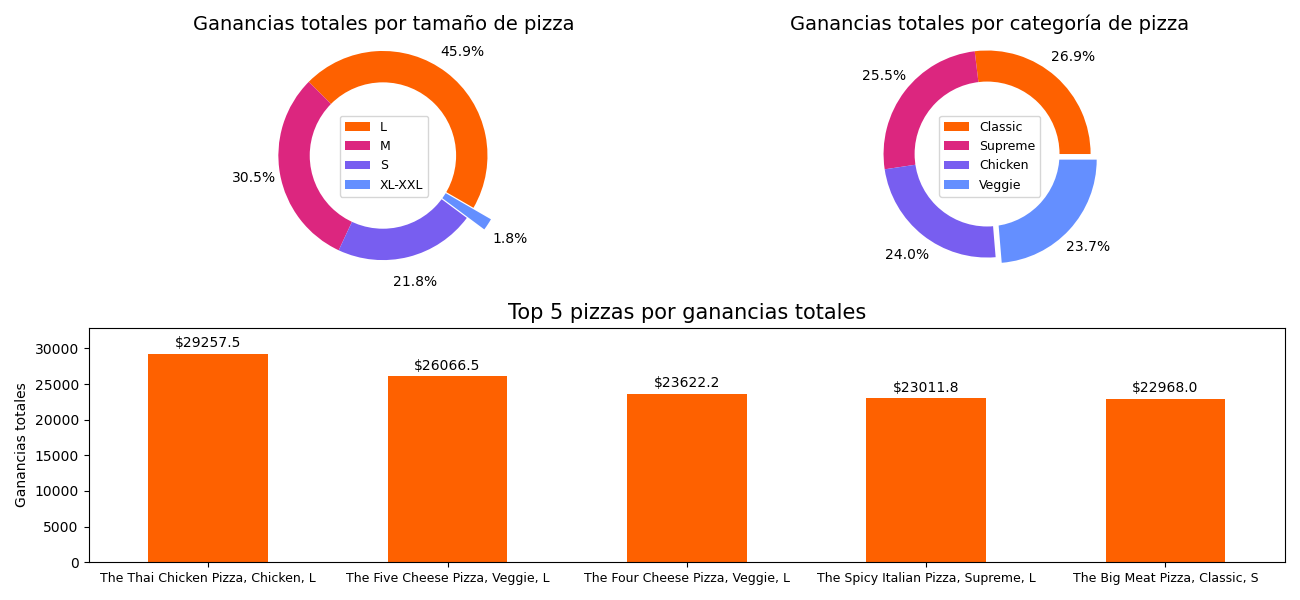

In [10]:
# Para maximizar/minimizar esta celda, presione el rectángulo azul/naranja del costado izquierdo

plt.close('all')

# Paleta de colores hecha por IBM, puesta en diferente orden para comodidades
colorList = ['#fe6100', '#dc267f', '#785ef0', '#648fff', '#ffb000', '#000000', '#ffffff']

# Crear el dataframe que usaremos para el gráfico
df_E3 = pd.merge(df_orderDet, pd.merge(df_pizza, df_pizzaTyp, on=['pizza_type_id'], how='inner'), on=['pizza_id'], how='inner')
df_E3['total_price'] = df_E3.quantity * df_E3.price
df_E3['pizza'] = df_E3['name'] + ', ' + df_E3['category'] + ', ' + df_E3['size']
df_E3.loc[(df_E3['size'] == 'XL') | (df_E3['size'] == 'XXL'), 'size'] = 'XL-XXL'
df_E3 = df_E3[['pizza', 'category', 'size', 'total_price', 'quantity']]
df_E3 = df_E3.groupby(['pizza', 'category', 'size']).agg({'quantity': ('sum'), 'total_price': ('sum')}).reset_index()
df_E3.columns = ['pizza', 'category', 'size', 'n_units', 'total_profit']

# Función para modificar los datos de cada barra y anotar sus valores
def barplots_xlabels(ax, rot, exh, sym):
    maxheight = 0
    for bar in ax.patches:
        width, height = bar.get_x() + bar.get_width() / 2, bar.get_height()
        if height != 0: ax.text(width,  height + exh, sym + '{}'.format(round(height, 1)), transform=ax.transData, fontsize=10, ha='center', va='center')
        if maxheight < height: maxheight = height
    ax.tick_params(axis='x', labelrotation = rot)
    ax.set_ylim(0, maxheight * 1.125)
    
# Función para graficar los anillos y las barras
def update_plot3(option):
    ax30.clear()
    ax31.clear()
    ax32.clear()
    
    E3RP1 = df_E3.groupby('size').agg({option[0]: ('sum')}).sort_values(option[0], ascending=False)
    E3RP2 = df_E3.groupby(['category']).agg({option[0]: ('sum')}).sort_values(option[0], ascending=False)
    E3RP3 = df_E3.groupby(['pizza']).agg({option[0]: ('sum')}).sort_values(option[0], ascending=False)[:5]
    
    E3RP1.plot(kind='pie', y=option[0], ax=ax30, labels=None, autopct='%1.1f%%', startangle=330, pctdistance=1.25, explode=[0, 0, 0, 0.2], colors=colorList[:4])
    ax30.add_artist(plt.Circle((0, 0), 0.70, fc='white'))
    ax30.set(xlabel='', ylabel='')
    ax30.set_title(option[1].capitalize() + ' por tamaño de pizza', fontsize=14)
    ax30.legend(labels=E3RP1.index, loc='center', fontsize=9)
    ax30.axis('equal')
    
    E3RP2.plot(kind='pie', y=option[0], ax=ax31, labels=None, autopct='%1.1f%%', startangle=0, pctdistance=1.25, explode=[0, 0, 0, 0.08], colors=colorList[:4])
    ax31.add_artist(plt.Circle((0, 0), 0.70, fc='white'))
    ax31.set(xlabel='', ylabel='')
    ax31.set_title(option[1].capitalize() + ' por categoría de pizza', fontsize=14)
    ax31.legend(labels=E3RP2.index, loc='center', fontsize=9)
    ax31.axis('equal')
    
    E3RP3.plot(kind='bar', y=option[0], ax=ax32, legend=None, color=colorList[0])
    ax32.set(xlabel='', ylabel=option[1].capitalize())
    ax32.tick_params(axis='x', labelsize=9)
    ax32.set_title('Top 5 pizzas por ' + option[1], fontsize=15)
    if option[0] == 'total_profit': barplots_xlabels(ax32, 0, 1500, '$')
    else: barplots_xlabels(ax32, 0, 100, '')
    
    fig3.tight_layout()
    fig3.canvas.draw()

# Crear el widget para mostrar por ganancias totales o por unidades pedidas
togb3 = widgets.ToggleButtons(
    options=[('Ganancias totales', ['total_profit', 'ganancias totales']), ('Unidades pedidas', ['n_units', 'unidades pedidas'])],
    value=['total_profit', 'ganancias totales'], description='Muestra por ganancias totales o unidades pedidas:',
    layout={'width': 'max-content', 'padding': '1px'}
)

# Crear la base (figura y axis) para el gráfico
fig3 = plt.figure(figsize=(13, 6))
gs = fig3.add_gridspec(2, 2)

ax30 = fig3.add_subplot(gs[0, 0])
ax31 = fig3.add_subplot(gs[0, 1])
ax32 = fig3.add_subplot(gs[1, :])

fig3.canvas.toolbar_visible = False
fig3.canvas.header_visible = False

# Conectar función 'update_plot' con el widget, y desplegar widget
solution3 = widgets.interactive_output(update_plot3, {'option': togb3})
sol3 = widgets.VBox([togb3, solution3])
display(sol3)

# Eliminar piezas una vez acabado el despliegue
del togb3, solution3, sol3

Los 2 gráficos de anillo muestran qué parte del total de ganancias o unidades pedidas cubre cada tamaño y categoría. El gráfico de barras muestra las 5 pizzas que más ganancias han generado durante el año 2015, o las pizzas más populares. Podemos concluir que:
- Los tamaños de pizza que generaron más ganancias, y también las más populares, fueron **L**, **M** y **S**.
- Las categorías que generaron más ganancias fueron las **Classic**, **Supreme** y **Chicken**.
- Las categorías más populares fueron las **Classic**, **Supreme** y **Veggie**.
- Las pizzas más importantes fueron:
    - **'The Thai Chicken Pizza', categoría Chicken y tamaño L**, con una recaudación de 29257.50 dólares y 1410 unidades pedidas.
    - **'The Five Cheese Pizza', categoría Veggie y tamaño L**, con una recaudación de 26066.50 dólares y 1409 unidades pedidas.
    - **'The Four Cheese Pizza', categoría Veggie y tamaño L**, con una recaudación de 23622.20 dólares y 1316 unidades pedidas.
    - **'The Big Meat Pizza', categoría Classic y tamaño S**, con una recaudación de 22968.00 dólares y 1914 unidades pedidas.
    - **'The Spicy Italian Pizza', categoría Supreme y tamaño L**, con una recaudación de 23011.80 dólares.
    - **'The Classic Deluxe Pizza', categoría Classic y tamaño M**, con 1181 unidades pedidas.    

## 4. ¿Cuáles son los ingredientes más importantes para el negocio?

### Planteamiento

Para este problema, necesitaremos usar 3 dataframes principales: 'df_orderDet', 'df_pizza' y 'df_pizzaTyp'. Pero antes, quiero mostrar algo:

In [35]:
pd.merge(df_pizza, df_pizzaTyp, on=['pizza_type_id'], how='inner')

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
...,...,...,...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
92,spinach_fet_l,spinach_fet,L,20.25,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
93,veggie_veg_s,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
94,veggie_veg_m,veggie_veg,M,16.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


Vemos que tenemos en total 96 pizzas, pero en la pregunta anterior vimos que sólo teníamos 91. Esto puede deberse a que 5 pizzas nunca fueron vendidas durante todo el año 2015.

En este caso, queremos saber cuáles son los ingredientes que más veces se han utilizado a lo largo del año 2015. Para ello, tenemos que usar las pizzas que SÍ fueron vendidas, y usar sus unidades pedidas para hallar el monto de ingredientes utilizado por cada pizza, y finalmente obtener los montos totales.

In [106]:
df_E4 = pd.merge(df_orderDet, pd.merge(df_pizza, df_pizzaTyp, on=['pizza_type_id'], how='inner'), on=['pizza_id'], how='inner')
df_E4 = df_E4.groupby('ingredients').agg({'quantity': ('sum')}).reset_index()
df_E4.ingredients[:5].to_list()

['Bacon, Pepperoni, Italian Sausage, Chorizo Sausage',
 'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce',
 'Brie Carre Cheese, Prosciutto, Caramelized Onions, Pears, Thyme, Garlic',
 'Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic',
 'Capocollo, Red Peppers, Tomatoes, Goat Cheese, Garlic, Oregano']

Muchos ingredientes, ¿verdad? Ahora, hagamos una función que nos devuelva el número de de ingredientes de cada fila:

In [107]:
inS = []
for ingList in df_E4.ingredients:
    newList = ingList.split(',')
    inS.append(len(newList))
    
print('lista inS:\n' + str(inS), '\n')
print('moda de la lista inS:\n' + str(pd.DataFrame(inS)[0].mode()[0]))

lista inS:
[4, 6, 6, 6, 6, 6, 7, 5, 6, 8, 6, 6, 7, 6, 6, 2, 6, 8, 3, 5, 3, 5, 3, 5, 7, 6, 5, 5, 8, 5, 8, 6] 

moda de la lista inS:
6


Vemos que el valor que más se repite es el 6, pero que hay valores que van desde 2 hasta 8. Agreguémos estos valores a nuestro dataframe:

In [108]:
df_E4['n_ing'] = inS
del inS
df_E4.head()

,ingredients,quantity,n_ing
0,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",1914,4
1,"Barbecued Chicken, Red Peppers, Green Peppers,...",2432,6
2,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",490,6
3,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",1884,6
4,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",1438,6


Ahora, repasemos la información brindada del diccionario:

*"En los ingredientes siempre habrá Mozzarella Cheese (queso Mozzarella) incluso si no lo espicifican, y Tomato Sauce (salsa de tomate) sólo no se incluye si mencionan otra salsa."*

Editemos los ingredientes de nuestro dataframe para que esté más parejo a estas indicaciones:

In [109]:
ingN = []

for ingList in df_E4.ingredients:
    newList = ingList.split(',')
    addC = addT = True
    ingItems = ''
    
    for ingredient in newList:
        if 'Mozzarella Cheese' in ingredient: addC = False        
        if 'Sauce' in ingredient: addT = False
        if addC == False and addT == False: break

    if addC == True: newList.append('Mozzarella Cheese')
    if addT == True: newList.append('Tomato Sauce')

    for ingredient in newList:
        if ingredient == newList[-1]: ingItems += ingredient
        else: ingItems += ingredient + ', '
        
    ingN.append(ingItems)

ingN[:5]

['Bacon,  Pepperoni,  Italian Sausage,  Chorizo Sausage, Mozzarella Cheese, Tomato Sauce',
 'Barbecued Chicken,  Red Peppers,  Green Peppers,  Tomatoes,  Red Onions,  Barbecue Sauce, Mozzarella Cheese',
 'Brie Carre Cheese,  Prosciutto,  Caramelized Onions,  Pears,  Thyme,  Garlic, Mozzarella Cheese, Tomato Sauce',
 'Calabrese Salami,  Capocollo,  Tomatoes,  Red Onions,  Green Olives,  Garlic, Mozzarella Cheese, Tomato Sauce',
 'Capocollo,  Red Peppers,  Tomatoes,  Goat Cheese,  Garlic,  Oregano, Mozzarella Cheese, Tomato Sauce']

Y ahora reemplazemos las listas de 'ingredients' por las nuevas listas, junto con los nuevos valores para 'n_ing':

In [110]:
df_E4['ingredients'] = ingN

inS = []
for ingList in df_E4.ingredients:
    newList = ingList.split(',')
    inS.append(len(newList))

df_E4['n_ing'] = inS
del ingN
df_E4.head()

,ingredients,quantity,n_ing
0,"Bacon, Pepperoni, Italian Sausage, Chorizo ...",1914,6
1,"Barbecued Chicken, Red Peppers, Green Pepper...",2432,7
2,"Brie Carre Cheese, Prosciutto, Caramelized O...",490,8
3,"Calabrese Salami, Capocollo, Tomatoes, Red ...",1884,8
4,"Capocollo, Red Peppers, Tomatoes, Goat Chee...",1438,8


Ahora, midamos la moda de nuestra columna actualizada:

In [111]:
print('Lista inS:\n' + str(inS), '\n')
print('moda de la lista inS:\n' + str(pd.DataFrame(inS)[0].mode()[0]))
del inS

Lista inS:
[6, 7, 8, 8, 8, 8, 9, 6, 7, 9, 7, 8, 8, 8, 8, 3, 7, 10, 5, 7, 4, 6, 4, 6, 9, 7, 7, 7, 10, 7, 9, 8] 

moda de la lista inS:
7


Pasamos de una moda de 6 a una moda de 8 ingredientes en la lista. Vemos que de ahí le siguen listas con 7 y 9 ingredientes en total *(qué detallistas son con las pizzas)*.

Ahora sí, veamos cuáles son los ingredientes más usados de todas las pizzas!

In [112]:
dictIC = {}

for (ingList, quantity) in list(zip(list(df_E4.ingredients), list(df_E4.quantity))):
    for ingredient in ingList.replace(',  ', ',').replace(', ', ',').split(','):
        if ingredient in dictIC: dictIC[ingredient] += quantity
        else: dictIC[ingredient] = quantity

df_E4R = pd.DataFrame(columns=['ingredient', 'n_pizzas'])
df_E4R.ingredient, df_E4R.n_pizzas = dictIC.keys(), dictIC.values()
df_E4R = df_E4R.groupby('ingredient').agg({'n_pizzas': ('sum')}).sort_values('n_pizzas', ascending=False)
del dictIC
df_E4R.head()

,n_pizzas
ingredient,
Mozzarella Cheese,49574
Tomato Sauce,37459
Garlic,27913
Tomatoes,27052
Red Onions,19834


Y ahora sí, ya tenemos respuesta a nuestra pregunta!

Algo que considero puede ser de utilidad para *después* es tener alguna solución para los ingredientes.

Al parecer, hay unas 20 o más de 20 celdas utilizadas en el planteamiento de esta pregunta para armar un dataframe exclusivo para mostrar el número de ingredientes usado en todo el año 2015. Quizás se pueda desarrollar una solución que pueda hacer más eficiente sacar estos números, sin tener que hacer tantos malabares.

### Respuesta

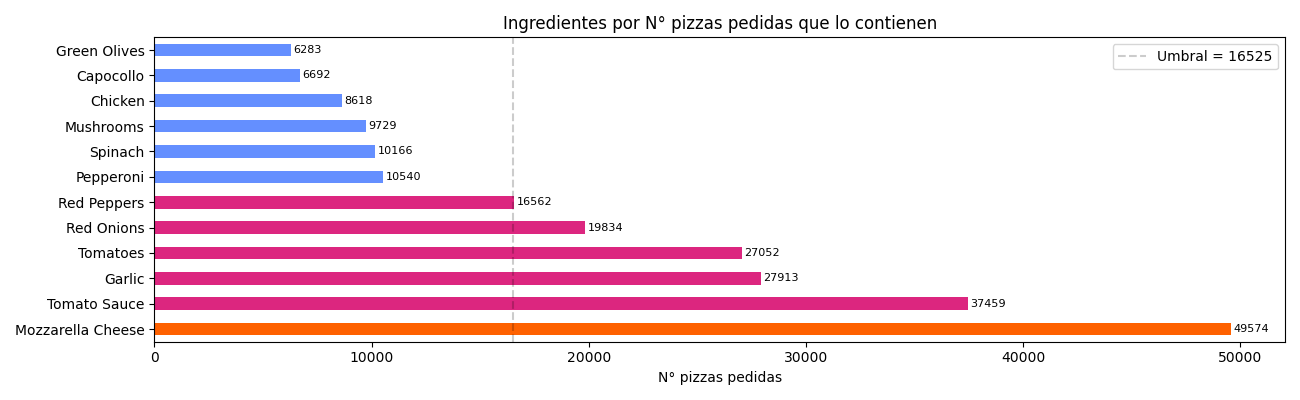

In [7]:
# Para maximizar/minimizar esta celda, presione el rectángulo azul/naranja del costado izquierdo

plt.close('all')

# Paleta de colores hecha por IBM, puesta en diferente orden para comodidades
colorList = ['#fe6100', '#dc267f', '#785ef0', '#648fff', '#ffb000', '#000000', '#ffffff']

# Función para anotar los valores de cada barra
def barplots_ylabels(ax, exw, fs, addC):
    barList = []
    [barList.append(i.get_width().astype(int)) for i in ax.patches]
    barList = list(filter(lambda x: x!=0, barList))
    barList.sort(reverse=True)
    
    for bar in ax.patches:
        value, width, height = round(bar.get_width()), round(bar.get_width()) + exw, bar.get_y() + bar.get_height() / 2
        if value != 0:
            if value in barList[:5] and addC: ax.text(width, height, '{}'.format(value), transform=ax.transData, fontsize=fs, ha='left', va='center', color='blue', weight='bold')
            elif value in barList[-5:] and addC: ax.text(width, height, '{}'.format(value), transform=ax.transData, fontsize=fs, ha='left', va='center', color='red', weight='bold')
            else: ax.text(width, height, '{}'.format(value), transform=ax.transData, fontsize=fs, ha='left', va='center', color='black')

# Función para modificar las listas de ingredientes de las pizzas vendidas
def modify_ingList(df):
    ingN = []
    
    for ingList in df.ingredients:
        newList = ingList.split(',')
        addC = addT = True
        ingItems = ''
        
        for ingredient in newList:
            if 'Mozzarella Cheese' in ingredient: addC = False
            if 'Sauce' in ingredient: addT = False
            if addC == False and addT == False: break
    
        if addC == True: newList.append('Mozzarella Cheese')
        if addT == True: newList.append('Tomato Sauce')
    
        for ingredient in newList:
            if ingredient == newList[-1]: ingItems += ingredient
            else: ingItems += ingredient + ', '
            
        ingN.append(ingItems)
    
    df['ingredients'] = ingN

# Crear el dataframe que usaremos para el gráfico
df_E4 = pd.merge(df_orderDet, pd.merge(df_pizza, df_pizzaTyp, on=['pizza_type_id'], how='inner'), on=['pizza_id'], how='inner')
df_E4 = df_E4.groupby('ingredients').agg({'quantity': ('sum')}).reset_index()

modify_ingList(df_E4)
dictIC = {}

for (ingList, quantity) in list(zip(list(df_E4.ingredients), list(df_E4.quantity))):
    for ingredient in ingList.replace(',  ', ',').replace(', ', ',').split(','):
        if ingredient in dictIC: dictIC[ingredient] += quantity
        else: dictIC[ingredient] = quantity

df_E4 = pd.DataFrame(columns=['ingredient', 'n_pizzas'])
df_E4.ingredient, df_E4.n_pizzas = dictIC.keys(), dictIC.values()
df_E4 = df_E4.groupby('ingredient').agg({'n_pizzas': ('sum')}).sort_values('n_pizzas', ascending=False)
del dictIC

# Crear el gráfico de barras
ER4P = df_E4[df_E4['n_pizzas'] >= 6000]

fig4 = plt.figure(figsize=(13, 4))
ax4 = fig4.add_subplot(111)

threshold = round(ER4P.n_pizzas.max()/3) # cerca del 33% del N° de pizzas pedidas (16525), es decir, cerca de un tercio del total

ER4P.plot(kind='barh', y='n_pizzas', ax=ax4, color=np.where(ER4P['n_pizzas'] >= threshold, np.where(ER4P['n_pizzas'] == ER4P.n_pizzas.max(), colorList[0], colorList[1]), colorList[3]))
ax4.set(xlabel='N° pizzas pedidas', ylabel='', title='Ingredientes por N° pizzas pedidas que lo contienen')
barplots_ylabels(ax4, 100, 8, False)
ax4.axvline(x=threshold, color='black', alpha=0.2, ls='--')
ax4.legend(labels=['Umbral = ' + str(threshold)])

fig4.canvas.toolbar_visible = False
fig4.canvas.header_visible = False
fig4.tight_layout()

plt.show()

del df_E4, fig4, ax4

El siguiente gráfico muestra, por cada ingrediente, cuántas de las pizzas pedidas en el año 2015 lo contienen en su lista.

*Aclaración: Sólo se muestran aquellos ingredientes que aparecen en por lo menos 6000 pizzas pedidas, ya que los demás no son de valor para el análisis.* 

Los ingredientes más importantes son aquellos que se encuentran por lo menos en más de un tercio del total de pizzas pedidas, y éstos son:
- Mozzarella Cheese **(Queso Mozzarella)**, que está presente en todas las pizzas pedidas.
- Tomato Sauce **(Salsa de tomate)**, que está presente en 37459 pizzas pedidas.
- Garlic **(Ajo)**, que está presente en 27913 pizzas pedidas.
- Tomatoes **(Tomates)**, que están presentes en 27052 pizzas pedidas.
- Red Onions **(Cebollas rojas)**, que están presentes en 19834 pizzas pedidas.
- Red Peppers **(Pimientos rojos)**, que están presente en 16562 pizzas pedidas.

## 5. ¿Cuáles son las pizzas menos pedidas y por qué?

### Planteamiento

Antes hemos visto cuáles son las pizzas que más ganancias generaron en el año 2015. Basándonos en lo obtenido en la pregunta 4, revisemos si hay algo que pueda diferenciar las pizzas más populares de las más impopulares.

In [91]:
df_E5 = pd.merge(pd.merge(df_order, df_orderDet, on=['order_id'], how='inner'), pd.merge(df_pizza, df_pizzaTyp, on=['pizza_type_id'], how='inner'), on=['pizza_id'], how='inner')
df_E5['pizza'] = df_E5['name'] + ', ' + df_E5['category'] + ', ' + df_E5['size']
df_E5.rename(columns={'quantity': 'n_units'}, inplace=True)
df_E5.groupby('pizza').agg({'n_units': ('sum')}).sort_values('n_units', ascending=False).head()

,n_units
pizza,
"The Big Meat Pizza, Classic, S",1914
"The Thai Chicken Pizza, Chicken, L",1410
"The Five Cheese Pizza, Veggie, L",1409
"The Four Cheese Pizza, Veggie, L",1316
"The Classic Deluxe Pizza, Classic, M",1181


Entre las pizzas más populares, tenemos:
- The Big Meat Pizza, Classic, S
- The Thai Chicken Pizza, Chicken, L
- The Five Cheese Pizza, Veggie, L
- The Four Cheese Pizza, Veggie, L
- The Classic Deluxe Pizza, Classic, M

In [92]:
df_E5.groupby('pizza').agg({'n_units': ('sum')}).sort_values('n_units', ascending=True).head()

,n_units
pizza,
"The Greek Pizza, Classic, XXL",28
"The Green Garden Pizza, Veggie, L",95
"The Chicken Alfredo Pizza, Chicken, S",96
"The Calabrese Pizza, Supreme, S",99
"The Mexicana Pizza, Veggie, S",162


Mientras las pizzas más impopulares son:
- The Greek Pizza, Classic, XXL
- The Green Garden Pizza, Veggie, L
- The Chicken Alfredo Pizza, Chicken, S
- The Calabrese Pizza, Supreme, S
- The Mexicana Pizza, Veggie, S	

Primero, revisemos la popularidad de las pizzas por tamaños, categorías y nombres (usaremos los 15 nombres más populares e impopulares, ya que sólo hay 31 nombres de pizzas):

In [93]:
print(df_E5.groupby(['name']).agg({'n_units': ('sum')}).sort_values('n_units', ascending=True).head(15))

                                            n_units
name                                               
The Brie Carre Pizza                            490
The Mediterranean Pizza                         934
The Calabrese Pizza                             937
The Spinach Supreme Pizza                       950
The Soppressata Pizza                           961
The Spinach Pesto Pizza                         970
The Chicken Pesto Pizza                         973
The Italian Vegetables Pizza                    981
The Chicken Alfredo Pizza                       987
The Green Garden Pizza                          997
The Pepperoni, Mushroom, and Peppers Pizza     1359
The Five Cheese Pizza                          1409
The Greek Pizza                                1420
The Italian Capocollo Pizza                    1438
The Pepper Salami Pizza                        1446


In [94]:
print(df_E5.groupby('size').agg({'n_units': ('sum')}).sort_values('n_units', ascending=False).head())
print(df_E5.groupby('category').agg({'n_units': ('sum')}).sort_values('n_units', ascending=False).head())
print(df_E5.groupby('name').agg({'n_units': ('sum')}).sort_values('n_units', ascending=False).head(15))
print(df_E5.groupby('name').agg({'n_units': ('sum')}).sort_values('n_units', ascending=True).head(15))

      n_units
size         
L       18956
M       15635
S       14403
XL        552
XXL        28
          n_units
category         
Classic     14888
Supreme     11987
Veggie      11649
Chicken     11050
                                   n_units
name                                      
The Classic Deluxe Pizza              2453
The Barbecue Chicken Pizza            2432
The Hawaiian Pizza                    2422
The Pepperoni Pizza                   2418
The Thai Chicken Pizza                2371
The California Chicken Pizza          2370
The Sicilian Pizza                    1938
The Spicy Italian Pizza               1924
The Southwest Chicken Pizza           1917
The Big Meat Pizza                    1914
The Four Cheese Pizza                 1902
The Italian Supreme Pizza             1884
The Vegetables + Vegetables Pizza     1526
The Mexicana Pizza                    1484
The Napolitana Pizza                  1464
                                            n_units
name       

Vemos que, de las pizzas más populares:
- Las 5 tienen un tamaño de los populares (tres L, una M y una S)
- 4 de ellas son de una categoría popular (dos Classic y dos Veggie) y 1 de ellas es de categoría impopular (Chicken)
- 4 de ellas pertenecen a un nombre popular ('The Classic Deluxe Pizza', 'The Thai Chicken Pizza', 'The Four Cheese Pizza' y 'The Big Meat Pizza') y 1 de ellas pertenece a un nombre impopular ('The Five Cheese Pizza')

Y, de las pizzas más impopulares:
- 1 de ellas tiene un tamaño muy impopular (XXL), 1 de ellas tiene un tamaño muy popular (L) y 3 de ellas tienen un tamaño ligeramente popular (S)
- 1 de ellas es de categoría impopular (Chicken), 2 de ellas son de categoría popular y muy popular (una Supreme y una Classic) y 2 de ellas son de categoría ligeramente popular (Veggie)
- 4 de ellas pertenecen a un nombre impopular ('The Calabrese Pizza', 'The Chicken Alfredo Pizza', 'The Green Garden Pizza' y 'The Greek Pizza') y 1 de ellas pertenece a un nombre popular ('The Mexicana Pizza')

En general, vemos que las pizzas populares encajan más con los tamaños, categorías y nombres populares. Si bien las pizzas impopulares sólo encajan en un tamaño impopular y una categoría impopular, encajan casi todas en un nombre impopular.

Lo que más sorprende es ver que 'The Five Cheese Pizza' sea un nombre impopular, mientras que 'The Mexicana Pizza' es un nombre popular. Siendo que ambas pizzas son de categoría 'Veggie', la razón detrás de esto puede ser que la pizza popular con el nombre 'The Five Cheese Pizza' es de tamaño L, el tamaño más popular de los 5 que hay, mientras que la pizza impopular con el nombre 'The Mexicana Pizza' es de tamaño S, uno ligeramente popular.

In [96]:
df_E5_ = df_E5[df_E5['name'] == 'The Mexicana Pizza']
df_E5_['month'] = df_E5_.date.str[5:7].astype(int)
df_E5_['day'] = df_E5_.date.str[8:].astype(int)
print(df_E5_.groupby(['name', 'category', 'size']).agg({'n_units': ('sum')}))
print(df_E5_.groupby(['name', 'month']).agg({'n_units': ('sum')}))
print(df_E5_.groupby(['name', 'day']).agg({'n_units': ('sum')}))
del df_E5_

<ipython-input-96-2582dc7fe1ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_E5_['month'] = df_E5_.date.str[5:7].astype(int)
<ipython-input-96-2582dc7fe1ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_E5_['day'] = df_E5_.date.str[8:].astype(int)


                                  n_units
name               category size         
The Mexicana Pizza Veggie   L         867
                            M         455
                            S         162
                          n_units
name               month         
The Mexicana Pizza 1          132
                   2          107
                   3          130
                   4          130
                   5          104
                   6          122
                   7          148
                   8          124
                   9          102
                   10         113
                   11         157
                   12         115
                        n_units
name               day         
The Mexicana Pizza 1         47
                   2         52
                   3         52
                   4         54
                   5         47
                   6         57
                   7         44
                   8      

Vemos que no hay fechas importantes en las que 'The Mexicana Pizza' haya vendido muchísimo, ni en meses, ni en días; pero comparando entre sus tamaños L, M y S, vemos que la S es por mucho la que menos vende.

Averiguando por internet, una pizza tamaño S (o *Small* - *Pequeña*) se sirve para 1 o 2 personas, mientras que la M se sirve para hasta 4 personas, y la L, hasta 5 personas. Asumamos que una pizza tamaño S es consumida por parejas o pares de amigo(a)s, mientras que las de tamaño M y L son consumidas por familias. En ese caso, la popularidad de la pizza es gracias a las familias que la consumen, mientras que en su tamaño para 1 o 2 personas no tiene muchos clientes.

### Respuesta

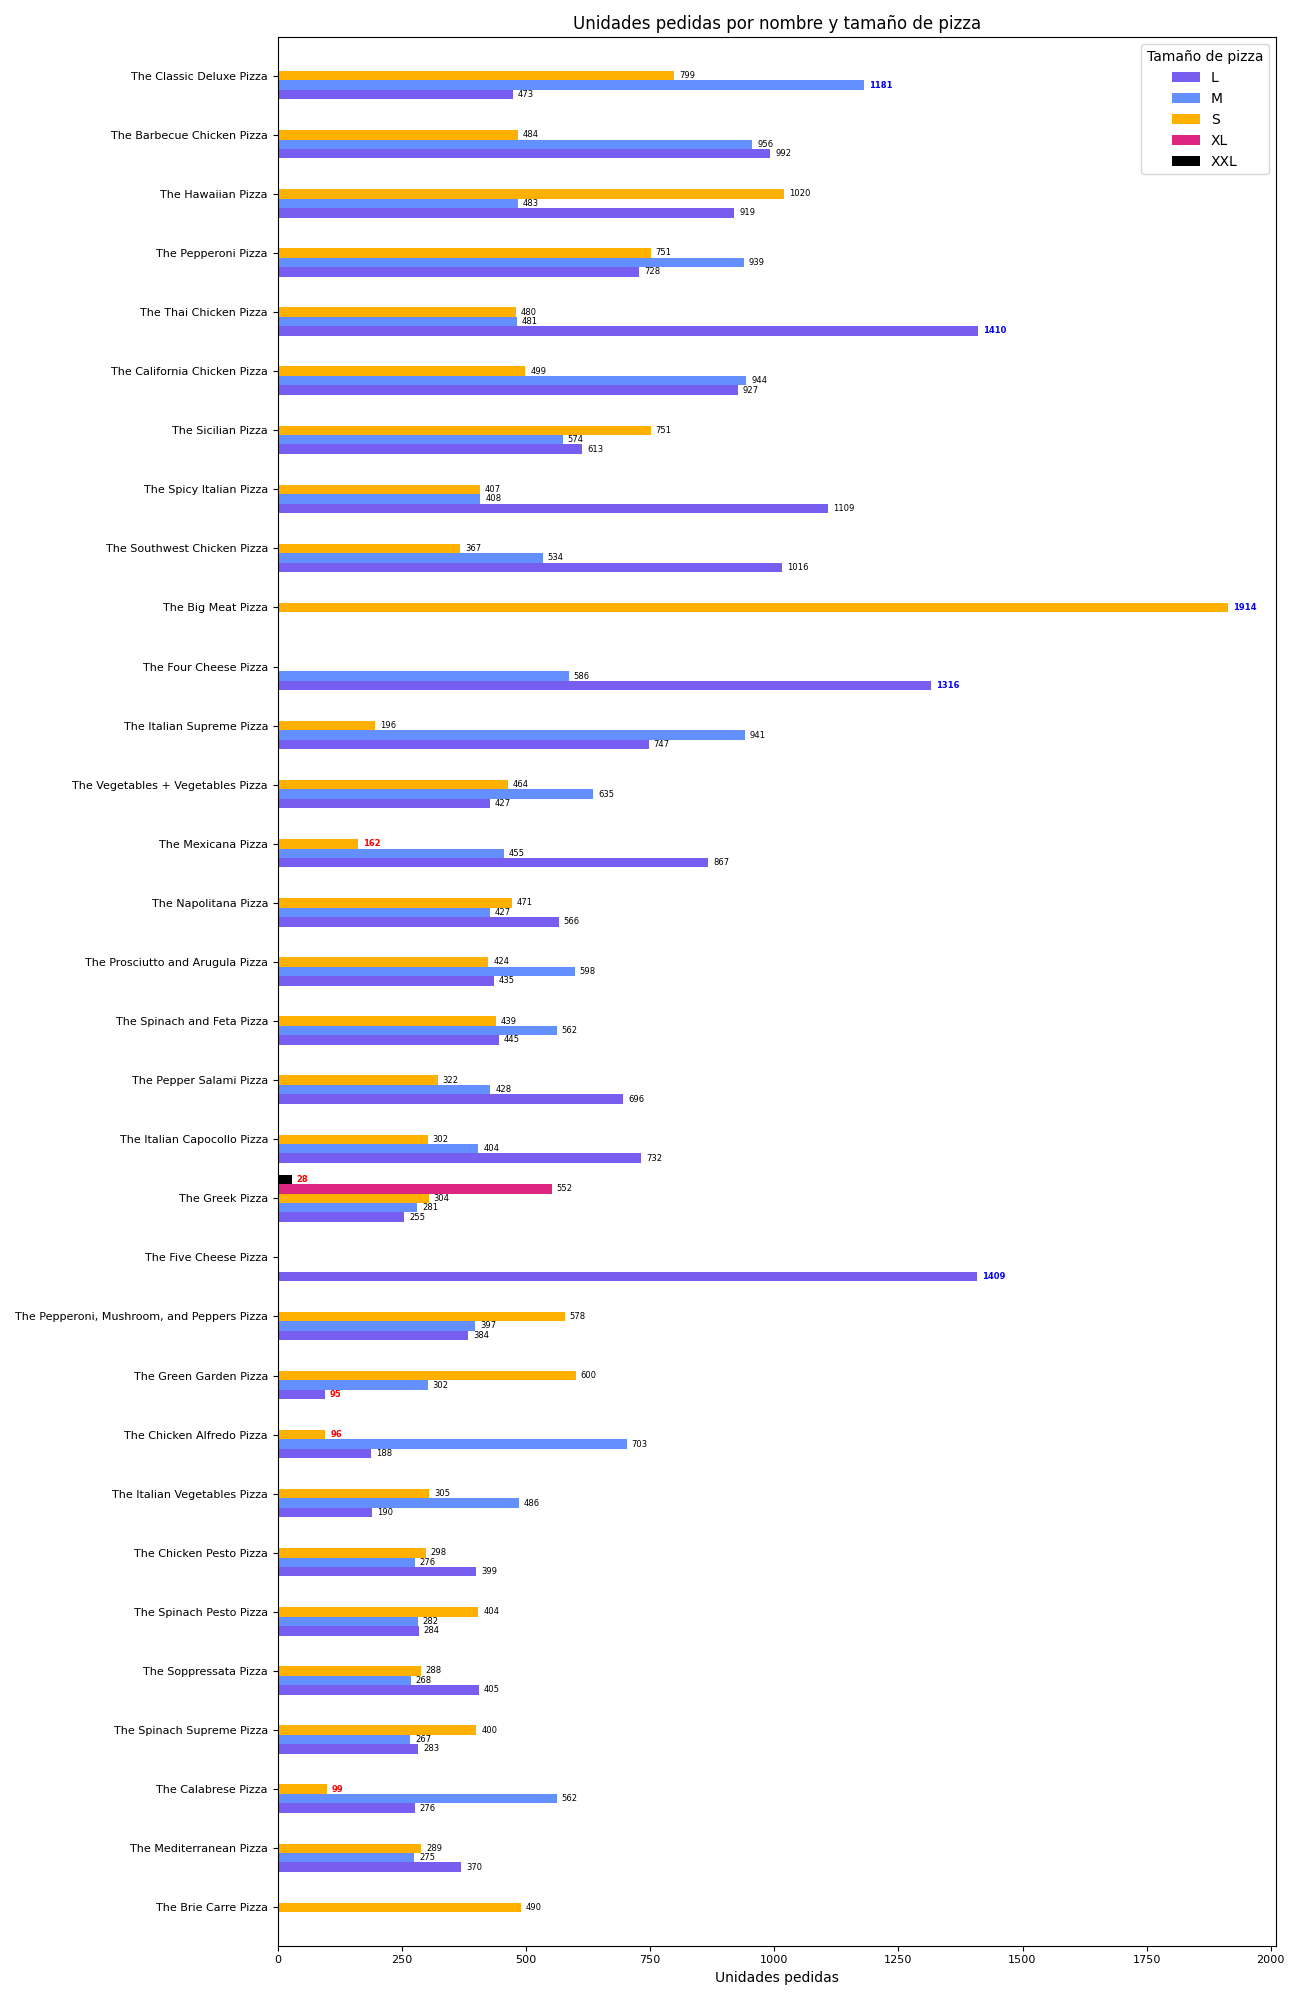

In [12]:
# Para maximizar/minimizar esta celda, presione el rectángulo azul/naranja del costado izquierdo

plt.close('all')

# Paleta de colores hecha por IBM, puesta en diferente orden para comodidades
colorList = ['#fe6100', '#dc267f', '#785ef0', '#648fff', '#ffb000', '#000000', '#ffffff']

# Función para anotar los valores de cada barra
def barplots_ylabels(ax, exw, fs, addC):
    barList = []
    [barList.append(i.get_width().astype(int)) for i in ax.patches]
    barList = list(filter(lambda x: x!=0, barList))
    barList.sort(reverse=True)
    
    for bar in ax.patches:
        value, width, height = round(bar.get_width()), round(bar.get_width()) + exw, bar.get_y() + bar.get_height() / 2
        if value != 0:
            if value in barList[:5] and addC: ax.text(width, height, '{}'.format(value), transform=ax.transData, fontsize=fs, ha='left', va='center', color='blue', weight='bold')
            elif value in barList[-5:] and addC: ax.text(width, height, '{}'.format(value), transform=ax.transData, fontsize=fs, ha='left', va='center', color='red', weight='bold')
            else: ax.text(width, height, '{}'.format(value), transform=ax.transData, fontsize=fs, ha='left', va='center', color='black')

# Crear el dataframe que usaremos para el gráfico
df_E5 = pd.merge(pd.merge(df_order, df_orderDet, on=['order_id'], how='inner'), pd.merge(df_pizza, df_pizzaTyp, on=['pizza_type_id'], how='inner'), on=['pizza_id'], how='inner')
df_E5.rename(columns={'quantity': 'n_units'}, inplace=True)
df_E5 = df_E5.groupby(['name','size']).agg({'n_units': ('sum')}).reset_index().pivot(index='name', columns='size', values='n_units').fillna(0)
df_E5['total'] = df_E5.L + df_E5.M + df_E5.S + df_E5.XL + df_E5.XXL
df_E5 = df_E5.sort_values('total', ascending=True).drop(columns=['total'])

# Crear el gráfico de barras
fig5 = plt.figure(figsize=(13, 20))
ax5 = fig5.add_subplot()
df_E5.plot(kind='barh', ax=ax5, y=['L', 'M', 'S', 'XL', 'XXL'], stacked=False, width=0.8, title='Unidades pedidas por nombre y tamaño de pizza', 
            xlabel='Unidades pedidas', ylabel='', color=[colorList[2], colorList[3], colorList[4], colorList[1], colorList[5]])
ax5.tick_params(axis='y', labelsize=8)
ax5.tick_params(axis='x', labelsize=8)
ax5.legend(title='Tamaño de pizza')
barplots_ylabels(ax5, 10, 6, True)

fig5.tight_layout()
fig5.canvas.toolbar_visible=False
fig5.canvas.header_visible=False

plt.show()

del df_E5, fig5, ax5

El siguiente gráfico muestra el N° unidades pedidas de cada pizza, por nombre y tamaño, a lo largo del 2015. aquellos valores en azul son de aquellas pizzas más populares, mientras que los valores en rojo son de las más impopulares. Podemos concluir que:
- Las pizzas más impopulares son:
    - **'The Greek Pizza' tamaño XXL**, con 28 unidades pedidas.
    - **'The Green Garden Pizza' tamaño L**, con 95 unidades pedidas.
    - **'The Chicken Alfredo Pizza' tamaño S**, 96 unidades pedidas.
    - **'The Calabrese Pizza' tamaño S**, con 99 unidades pedidas.
    - **'The Mexicana Pizza' tamaño S**, 162 unidades pedidas.
- Las primeras 4 pizzas son impopulares ya que, de por sí, sus nombres se encuentran entre los nombres de pizza impopulares.
- Aunque 'The Mexicana Pizza' sea un nombre popular, es más consumida por familias que por parejas o grupos de 2 personas, lo cual explicaría el porqué de la impopularidad de su tamaño S.

# 5) Consejos e ideas post-análisis:

Habiendo respondido a todas las preguntas, indicaré lo que considero que debería hacer el negocio para hacerse mejor ante la competencia y sus clientes.


1. Debería haber dos meses al año en que hayan ofertas en todas las pizzas. Una buena opción podría ser enero y julio, siendo ambos meses en los que se reportó mayores ganancias y unidades pedidas, así como también, los primeros meses de cada semestre del año, por lo que sería 'Una buena forma de empezar la 1ra/2da mitad del año!'. Así, aumentarían ventas y clientes, mientras se fijan meses importantes para el negocio. Fuera de estos meses, también podrían establecer fechas especiales, como el Día Internacional de la Pizza, por ejemplo.
3. Desde el mediodía hasta la 1pm o 2pm, se debería ofrecer un combo con un ligero descuento; por ejemplo, un combo de bebida más una pizza tamaño S. El propósito de esta propuesta sería, además de aumentar las ventas, aumentar el consumo de pizzas de tamaño S en general, pues hay varias pizzas cuyas ventas en tamaño S son escasas.
4. Aconsejaría quitar las pizzas de tamaño XXL, y quizás también las de tamaño XL, ya que no representan ni el 2% en ganancias y unidades pedidas durante todo el año 2015.
5. Se debería ofrecer descuentos por pedir varias pizzas, desde las 5pm hasta las 7pm u 8pm; por ejemplo, si pides dos pizzas iguales, pagas el 100% de una y el 75% de la otra. También se podría reducir la diferencia de precios entre una pizza tamaño S y M a la mitad, y lo mismo con la diferencia de precios entre una pizza tamaño M y L.
6. Aconsejaría crear dos datasets más: Uno que guarde los ingredientes por código y su nombre, y otro que guarde los códigos de las pizzas y los ingredientes que cada una utiliza. Esto facilitaría enormemente el análisis de información a futuro, especialmente si el negocio planea realizar un control de inventarios en alguna base de datos.